In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
df = pd.read_csv("compositeData.csv")
df

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
0,4,100,0,50.38
1,4,100,0,30.36
2,4,75,25,25.24
3,4,75,25,27.22
4,4,75,25,23.01
5,4,50,50,23.71
6,4,50,50,26.87
7,4,50,50,22.89
8,4,25,75,32.67
9,4,25,75,32.11


In [4]:
df.describe()

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
count,45.000000,45.00000,45.00000,45.000000
mean,7.644444,50.00000,50.00000,28.121778
std,3.053728,36.14994,36.14994,7.342803
min,4.000000,0.00000,0.00000,10.540000
25%,4.000000,25.00000,25.00000,23.710000
50%,8.000000,50.00000,50.00000,27.870000
75%,8.000000,75.00000,75.00000,32.110000
max,12.000000,100.00000,100.00000,50.380000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fibre_length          45 non-null     int64  
 1   basalt_fiber_content  45 non-null     int64  
 2   curaua_fiber_content  45 non-null     int64  
 3   tensile_strength      45 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.5 KB


In [6]:
df.columns

Index(['fibre_length', 'basalt_fiber_content', 'curaua_fiber_content',
       'tensile_strength'],
      dtype='object')

In [7]:
px.box(df)

Text(0.5, 1.0, '\nRaw Data Correlation Matrix\n')

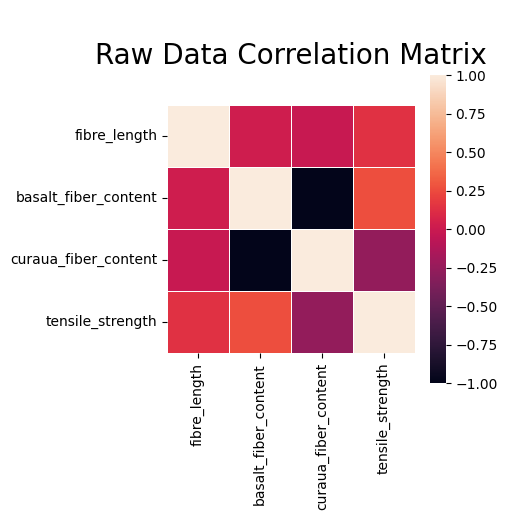

In [8]:
plt.figure(figsize=(df.corr().shape))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, square = True)
plt.title("\nRaw Data Correlation Matrix\n", size = 20)

/Users/Sid/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:1615: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.



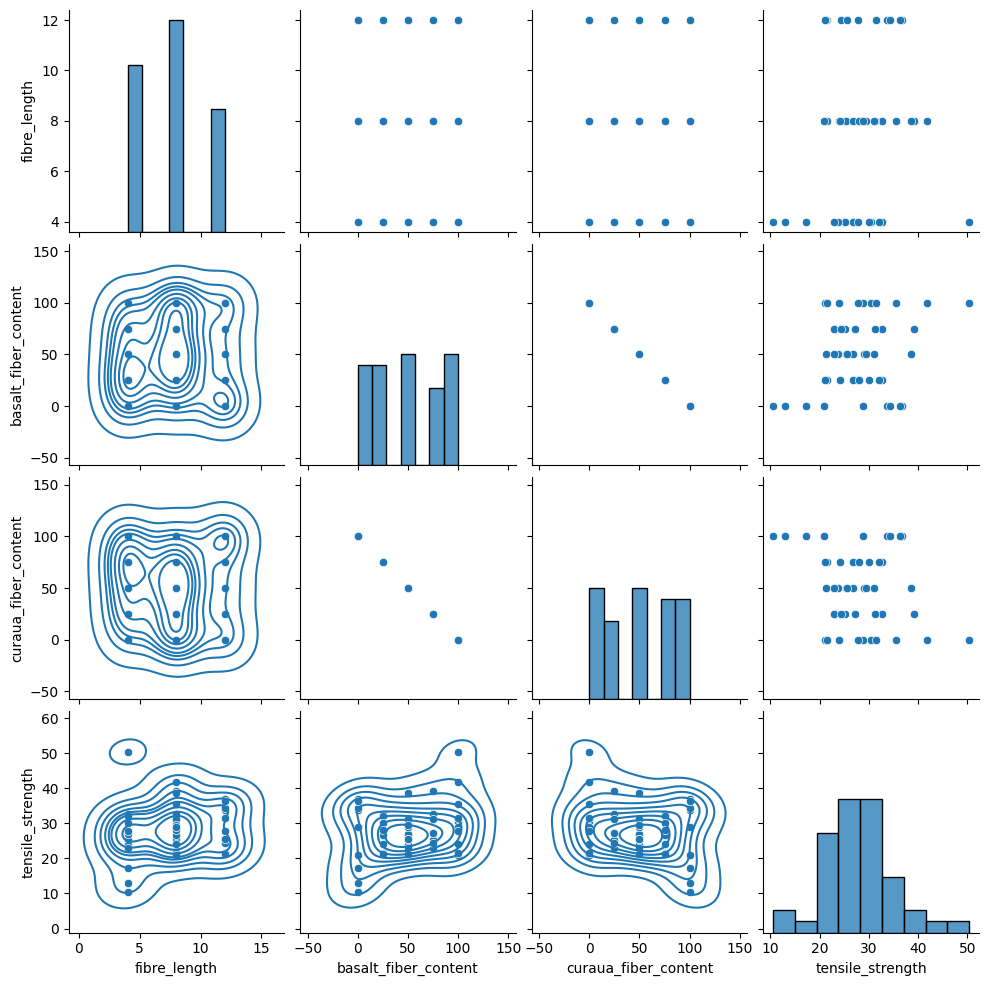

In [9]:
pairGrid = sns.pairplot(data = df)
pairGrid.map_lower(sns.kdeplot)

In [10]:
dataStuff = df[['fibre_length', 'basalt_fiber_content', 'curaua_fiber_content']]
targetStuff = df['tensile_strength']

In [11]:
dfAugmented = pd.read_csv("compositeDataAugmneted.csv")
dfAugmented 

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
0,8,50,50,29.02
1,8,100,0,28.82
2,12,0,100,36.36
3,12,25,75,21.15
4,12,100,0,21.42
...,...,...,...,...
130,12,100,0,21.42
131,4,75,25,25.24
132,4,50,50,26.87
133,8,25,75,27.98


In [12]:
dfAugmented.describe()

,fibre_length,basalt_fiber_content,curaua_fiber_content,tensile_strength
count,135.000000,135.00000,135.00000,135.000000
mean,7.644444,50.00000,50.00000,28.121778
std,3.030853,35.87915,35.87915,7.287800
min,4.000000,0.00000,0.00000,10.540000
25%,4.000000,25.00000,25.00000,23.710000
50%,8.000000,50.00000,50.00000,27.870000
75%,8.000000,75.00000,75.00000,32.110000
max,12.000000,100.00000,100.00000,50.380000


In [13]:
dfAugmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fibre_length          135 non-null    int64  
 1   basalt_fiber_content  135 non-null    int64  
 2   curaua_fiber_content  135 non-null    int64  
 3   tensile_strength      135 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 4.3 KB


In [14]:
dataStuffAugmented = dfAugmented[['fibre_length', 'basalt_fiber_content', 'curaua_fiber_content']]
targetStuffAugmented = dfAugmented['tensile_strength']

In [15]:
xTrain, xTest, yTrain, yTest = train_test_split(dataStuffAugmented, targetStuffAugmented, test_size=0.2, random_state=42)

# LinearReg Model

In [16]:
modelLR = LinearRegression()
modelLR.fit(xTrain, yTrain)

LinearRegression()

In [17]:
yPred = modelLR.predict(xTest)
yPred

array([30.45327642, 25.64445089, 29.78854423, 31.83464086, 28.40717978,
       26.97391527, 28.40717978, 25.64445089, 26.30918308, 30.45327642,
       29.78854423, 26.30918308, 31.16990868, 29.78854423, 31.11800861,
       25.64445089, 29.73664416, 32.49937305, 25.64445089, 31.11800861,
       29.78854423, 29.07191197, 29.73664416, 31.83464086, 26.30918308,
       30.45327642, 26.97391527])

In [18]:
rmseLR = np.sqrt(mean_squared_error(yTest, yPred))
mseLR = mean_squared_error(yTest, yPred)
rsLR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLR)
print('Mean Squared Error:', mseLR)
print('R-squared:', rsLR)

Root Mean Square Error:  7.583371832689423
Mean Squared Error: 57.50752835282733
R-squared: -0.37570387962225427


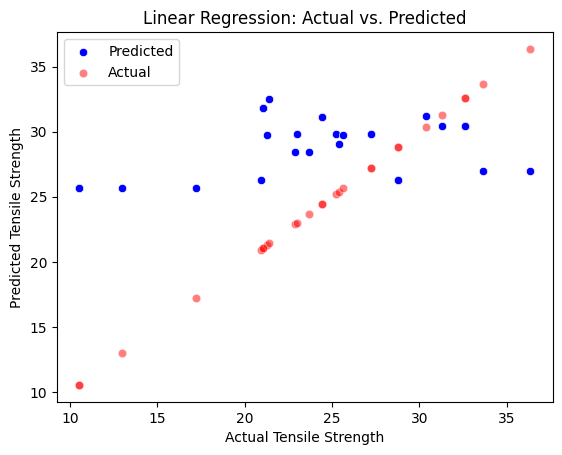

In [19]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RidgeReg Model

In [20]:
modelRR = Ridge(alpha=1.0)
modelRR.fit(xTrain, yTrain)

Ridge()

In [21]:
yPred = modelRR.predict(xTest)
yPred

array([30.45322304, 25.64510103, 29.78918942, 31.83458583, 28.40782662,
       26.97316827, 28.40782662, 25.64510103, 26.30913465, 30.45322304,
       29.78918942, 26.30913465, 31.17055222, 29.78918942, 31.11725665,
       25.64510103, 29.73589386, 32.49861945, 25.64510103, 31.11725665,
       29.78918942, 29.07186024, 29.73589386, 31.83458583, 26.30913465,
       30.45322304, 26.97316827])

In [22]:
rmseRR = np.sqrt(mean_squared_error(yTest, yPred))
mseRR = mean_squared_error(yTest, yPred)
rsRR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRR)
print('Mean Squared Error:', mseRR)
print('R-squared:', rsRR)

Root Mean Square Error:  7.583538667589528
Mean Squared Error: 57.51005872282556
R-squared: -0.3757644115199581


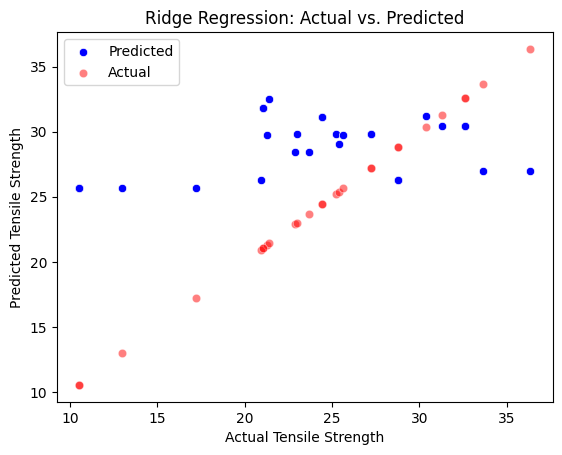

In [23]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# LassoReg Model

In [24]:
modelLSR = Lasso(alpha=1.0)
modelLSR.fit(xTrain, yTrain)

Lasso()

In [25]:
yPred = modelLSR.predict(xTest)
yPred

array([30.40197459, 26.10079031, 30.1914089 , 31.76551412, 28.82786937,
       26.52192167, 28.82786937, 26.10079031, 26.31135599, 30.40197459,
       30.1914089 , 26.31135599, 31.55494844, 30.1914089 , 30.61254027,
       26.10079031, 29.24900074, 31.9760798 , 26.10079031, 30.61254027,
       30.1914089 , 29.03843505, 29.24900074, 31.76551412, 26.31135599,
       30.40197459, 26.52192167])

In [26]:
rmseLSR = np.sqrt(mean_squared_error(yTest, yPred))
mseLSR = mean_squared_error(yTest, yPred)
rsLSR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseLSR)
print('Mean Squared Error:', mseLSR)
print('R-squared:', rsLSR)

Root Mean Square Error:  7.698339840096519
Mean Squared Error: 59.2644362936173
R-squared: -0.4177328998134009


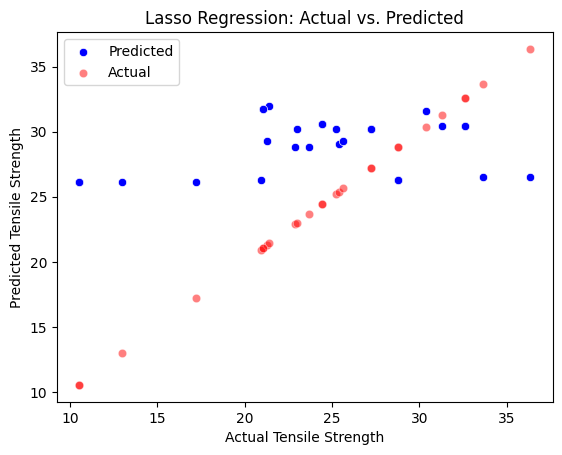

In [27]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Lasso Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# ElasticNetReg Model

In [28]:
modelEN = ElasticNet(alpha=1.0, l1_ratio=0.5)
modelEN.fit(xTrain, yTrain)

ElasticNet()

In [29]:
yPred = modelEN.predict(xTest)
yPred

array([30.42585412, 25.89446237, 30.01173142, 31.79827714, 28.6393084 ,
       26.72270775, 28.6393084 , 25.89446237, 26.30858506, 30.42585412,
       30.01173142, 26.30858506, 31.38415444, 30.01173142, 30.83997681,
       25.89446237, 29.46755379, 32.21239983, 25.89446237, 30.83997681,
       30.01173142, 29.0534311 , 29.46755379, 31.79827714, 26.30858506,
       30.42585412, 26.72270775])

In [30]:
rmseEN = np.sqrt(mean_squared_error(yTest, yPred))
mseEN = mean_squared_error(yTest, yPred)
rsEN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseEN)
print('Mean Squared Error:', mseEN)
print('R-squared:', rsEN)

Root Mean Square Error:  7.644904588327088
Mean Squared Error: 58.44456616462456
R-squared: -0.39811984132266387


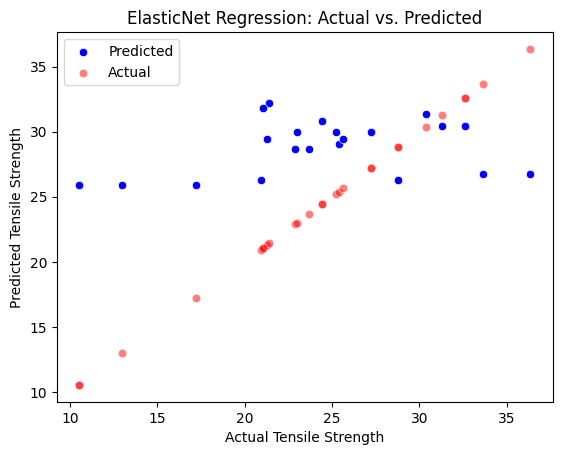

In [31]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# PolyReg Model

In [32]:
for i in range(1, 25):
    polyReg = PolynomialFeatures(degree=i)
    linReg = LinearRegression()
    modelPR = Pipeline([('poly', polyReg), ('linear', linReg)])
    modelPR.fit(xTrain, yTrain)
    yPred = modelPR.predict(xTest)
    print("Poly Features Degree: ", i)
    rmsePR = np.sqrt(mean_squared_error(yTest, yPred))
    msePR = mean_squared_error(yTest, yPred)
    rsPR = r2_score(yTest, yPred)
    print("Root Mean Square Error: ", rmsePR)
    print('Mean Squared Error:', msePR)
    print('R-squared:', rsPR)
    print("\n")

Poly Features Degree:  1
Root Mean Square Error:  7.583371832689423
Mean Squared Error: 57.50752835282733
R-squared: -0.37570387962225427


Poly Features Degree:  2
Root Mean Square Error:  6.336789266624013
Mean Squared Error: 40.1548982096013
R-squared: 0.03940838990919149


Poly Features Degree:  3
Root Mean Square Error:  5.801872976595796
Mean Squared Error: 33.661730036552555
R-squared: 0.19473895101239247


Poly Features Degree:  4
Root Mean Square Error:  5.581378449487092
Mean Squared Error: 31.15178539639894
R-squared: 0.2547822301794521


Poly Features Degree:  5
Root Mean Square Error:  4.733078388999803
Mean Squared Error: 22.40203103641697
R-squared: 0.46409519082205875


Poly Features Degree:  6
Root Mean Square Error:  4.745514828281129
Mean Squared Error: 22.519910985436077
R-squared: 0.4612752486711754


Poly Features Degree:  7
Root Mean Square Error:  4.745514828281129
Mean Squared Error: 22.519910985436074
R-squared: 0.4612752486711754


Poly Features Degree:  8
Ro

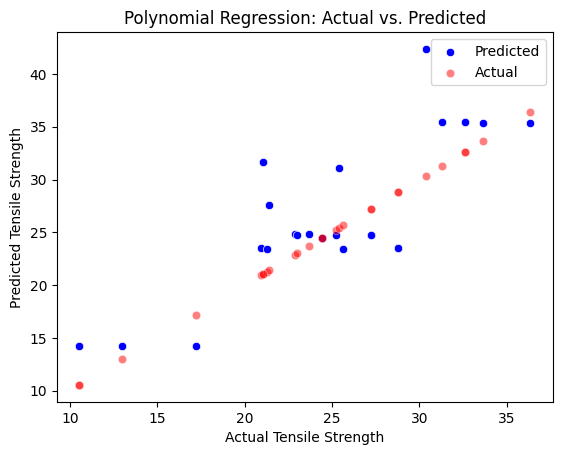

In [33]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# KNeighborsReg Model

In [34]:
modelKN = KNeighborsRegressor(n_neighbors=3)
modelKN.fit(xTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

In [35]:
yPred = modelKN.predict(xTest)
yPred

array([36.96      , 14.4       , 25.15666667, 32.79666667, 24.49      ,
       35.46333333, 24.49      , 14.4       , 23.54      , 36.96      ,
       25.15666667, 23.54      , 37.03333333, 25.15666667, 32.05666667,
       14.4       , 22.72333333, 26.92666667, 14.4       , 32.05666667,
       25.15666667, 29.18666667, 22.72333333, 32.79666667, 23.54      ,
       36.96      , 35.46333333])

In [36]:
rmseKN = np.sqrt(mean_squared_error(yTest, yPred))
mseKN = mean_squared_error(yTest, yPred)
rsKN = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseKN)
print('Mean Squared Error:', mseKN)
print('R-squared:', rsKN)

Root Mean Square Error:  5.038531164565354
Mean Squared Error: 25.386796296296303
R-squared: 0.3926931802438064


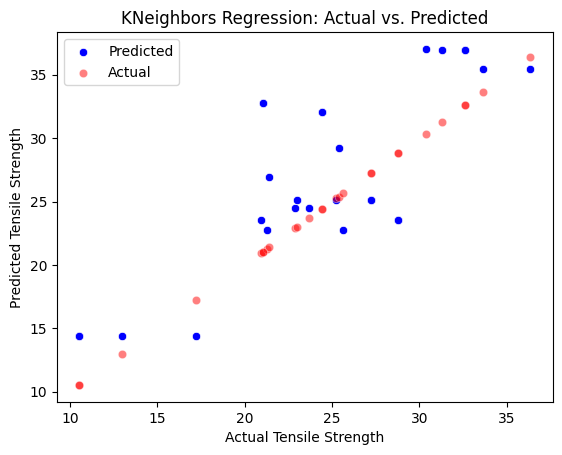

In [37]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('KNeighbors Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# DecisionTreeReg Model

In [38]:
modelDT = DecisionTreeRegressor(random_state=42)
modelDT.fit(xTrain, yTrain)

DecisionTreeRegressor(random_state=42)

In [39]:
yPred = modelDT.predict(xTest)
yPred

array([35.43666667, 14.188     , 24.744     , 31.65923077, 24.83      ,
       35.375     , 24.83      , 14.188     , 23.54      , 35.43666667,
       24.744     , 23.54      , 42.372     , 24.744     , 24.43      ,
       14.188     , 23.455     , 27.615     , 14.188     , 24.43      ,
       24.744     , 31.11785714, 23.455     , 31.65923077, 23.54      ,
       35.43666667, 35.375     ])

In [40]:
rmseDT = np.sqrt(mean_squared_error(yTest, yPred))
mseDT = mean_squared_error(yTest, yPred)
rsDT = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseDT)
print('Mean Squared Error:', mseDT)
print('R-squared:', rsDT)

Root Mean Square Error:  4.745514828281116
Mean Squared Error: 22.51991098543595
R-squared: 0.4612752486711784


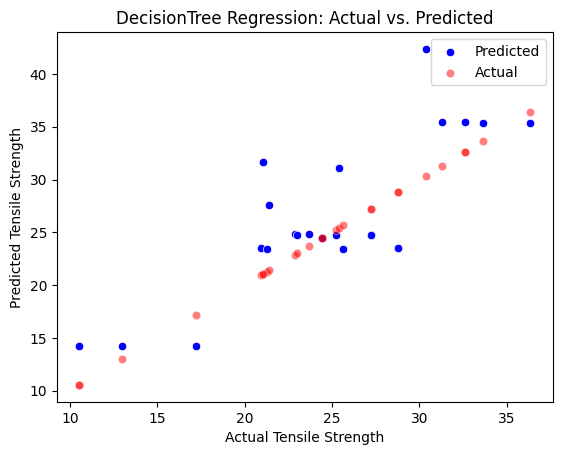

In [41]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# RandomForestReg Model

In [42]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(xTrain, yTrain)

RandomForestRegressor(random_state=42)

In [43]:
yPred = modelRF.predict(xTest)
yPred

array([35.52594949, 14.2250419 , 24.87247024, 31.72273868, 24.9117425 ,
       35.33147959, 24.9117425 , 14.2250419 , 23.94799233, 35.52594949,
       24.87247024, 23.94799233, 42.27271889, 24.87247024, 26.10740555,
       14.2250419 , 23.34282298, 27.39831145, 14.2250419 , 26.10740555,
       24.87247024, 31.1996155 , 23.34282298, 31.72273868, 23.94799233,
       35.52594949, 35.33147959])

In [44]:
rmseRF = np.sqrt(mean_squared_error(yTest, yPred))
mseRF = mean_squared_error(yTest, yPred)
rsRF = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseRF)
print('Mean Squared Error:', mseRF)
print('R-squared:', rsRF)

Root Mean Square Error:  4.745925447927575
Mean Squared Error: 22.52380835728655
R-squared: 0.46118201514630297


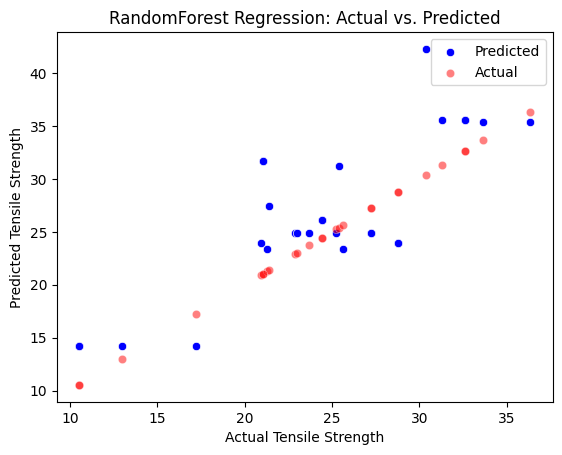

In [45]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# SupportVectorReg Model

In [46]:
modelSVR = SVR()
modelSVR.fit(xTrain, yTrain)

SVR()

In [47]:
yPred = modelSVR.predict(xTest)
yPred

array([29.05684537, 29.34638612, 29.05861581, 30.2380929 , 27.58162975,
       29.50110372, 27.58162975, 29.34638612, 29.42406925, 29.05684537,
       29.05861581, 29.42406925, 30.25999983, 29.05861581, 29.05644276,
       29.34638612, 27.6016754 , 30.20780714, 29.34638612, 29.05644276,
       29.05861581, 27.58458788, 27.6016754 , 30.2380929 , 29.42406925,
       29.05684537, 29.50110372])

In [48]:
rmseSVR = np.sqrt(mean_squared_error(yTest, yPred))
mseSVR = mean_squared_error(yTest, yPred)
rsSVR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseSVR)
print('Mean Squared Error:', mseSVR)
print('R-squared:', rsSVR)

Root Mean Square Error:  7.989169733517815
Mean Squared Error: 63.82683303095711
R-squared: -0.5268752516360333


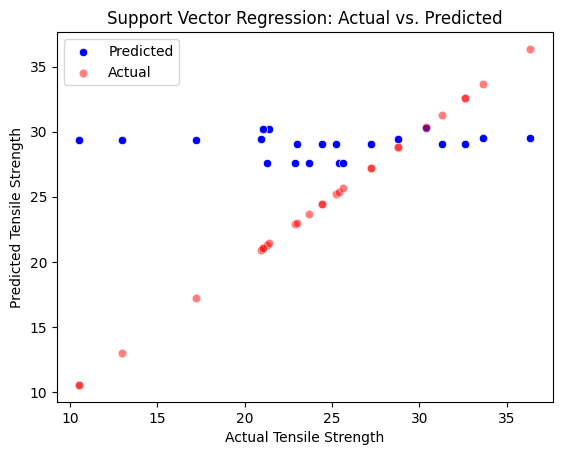

In [49]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Support Vector Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# GradBoostingReg Model

In [50]:
modelGBR = GradientBoostingRegressor(random_state=42)
modelGBR.fit(xTrain, yTrain)

GradientBoostingRegressor(random_state=42)

In [51]:
yPred = modelGBR.predict(xTest)
yPred

array([35.31685749, 14.28087027, 24.66213265, 31.73254097, 25.08993362,
       35.33637593, 25.08993362, 14.28087027, 23.53601242, 35.31685749,
       24.66213265, 23.53601242, 42.24687307, 24.66213265, 25.1171701 ,
       14.28087027, 23.46024781, 27.60932161, 14.28087027, 25.1171701 ,
       24.66213265, 30.98299924, 23.46024781, 31.73254097, 23.53601242,
       35.31685749, 35.33637593])

In [52]:
rmseGBR = np.sqrt(mean_squared_error(yTest, yPred))
mseGBR = mean_squared_error(yTest, yPred)
rsGBR = r2_score(yTest, yPred)
print("Root Mean Square Error: ", rmseGBR)
print('Mean Squared Error:', mseGBR)
print('R-squared:', rsGBR)

Root Mean Square Error:  4.747852407137913
Mean Squared Error: 22.54210247996527
R-squared: 0.4607443803484904


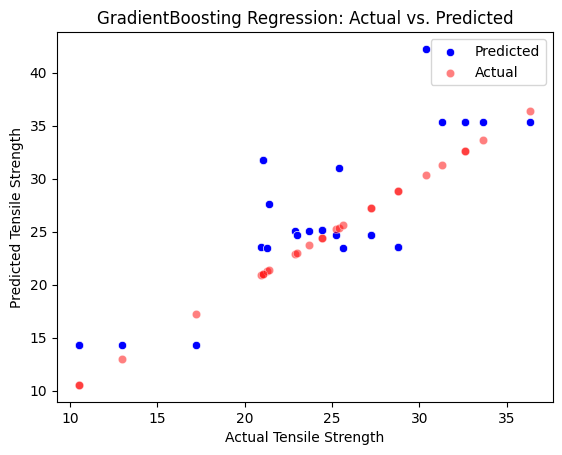

In [53]:
sns.scatterplot(x=yTest, y=yPred, color='blue', label='Predicted')
sns.scatterplot(x=yTest, y=yTest, color='red', alpha=0.5, label='Actual')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('GradientBoosting Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [54]:
models = ['Linear Reg', 'Ridge Reg', 'Lasso Reg', 'ElasticNet Reg', 'Poly Reg', 'KNeighbors Reg', 'DecisionTree Reg', 'RandomForest Reg', 'SupportVector Reg', 'GradientBoosting Reg']
rsScores = [rsLR, rsRR, rsLSR, rsEN, rsPR, rsKN, rsDT, rsRF, rsSVR, rsGBR]
mseScores = [mseLR, mseRR, mseLSR, mseEN, msePR, mseKN, mseDT, mseRF, mseSVR, mseGBR]
rmseScores = [rmseLR, rmseRR, rmseLSR, rmseEN, rmsePR, rmseKN, rmseDT, rmseRF, rmseSVR, rmseGBR]

In [55]:
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg']

In [56]:
rsDf = pd.DataFrame(list(zip(models, rsScores)), columns = ['Model', 'R-squared'])
fig = px.bar(rsDf, x='Model', y='R-squared', title='Model Comparison (R-squared)')
fig.show()

In [57]:
mseDf = pd.DataFrame(list(zip(models, mseScores)), columns = ['Model', 'MSE'])
fig = px.bar(mseDf, x='Model', y='MSE', title='Model Comparison (Mean Squared Error)')
fig.show()

In [58]:
rmseDf = pd.DataFrame(list(zip(models, rmseScores)), columns = ['Model', 'RMSE'])
fig = px.bar(rmseDf, x='Model', y='RMSE', title='Model Comparison (Root Mean Squared Error)')
fig.show()

In [59]:
outLR = modelLR.predict(dataStuff)
outRR = modelRR.predict(dataStuff)
outLSR = modelLSR.predict(dataStuff)
outEN = modelEN.predict(dataStuff)
outPR = modelPR.predict(dataStuff)
outKN = modelKN.predict(dataStuff)
outDT = modelDT.predict(dataStuff)
outRF = modelRF.predict(dataStuff)
outSVR = modelSVR.predict(dataStuff)
outGBR = modelGBR.predict(dataStuff)
outActual = np.array(targetStuff)
outList = [outLR, outRR, outLSR, outEN, outPR, outKN, outDT, outRF, outSVR, outGBR, outActual]
outList

[array([31.16990868, 31.16990868, 29.78854423, 29.78854423, 29.78854423,
        28.40717978, 28.40717978, 28.40717978, 27.02581534, 27.02581534,
        27.02581534, 27.02581534, 25.64445089, 25.64445089, 25.64445089,
        31.83464086, 31.83464086, 31.83464086, 31.83464086, 31.83464086,
        30.45327642, 30.45327642, 30.45327642, 29.07191197, 29.07191197,
        29.07191197, 29.07191197, 29.07191197, 27.69054753, 27.69054753,
        27.69054753, 27.69054753, 26.30918308, 26.30918308, 32.49937305,
        32.49937305, 32.49937305, 31.11800861, 29.73664416, 29.73664416,
        28.35527972, 26.97391527, 26.97391527, 26.97391527, 26.97391527]),
 array([31.17055222, 31.17055222, 29.78918942, 29.78918942, 29.78918942,
        28.40782662, 28.40782662, 28.40782662, 27.02646383, 27.02646383,
        27.02646383, 27.02646383, 25.64510103, 25.64510103, 25.64510103,
        31.83458583, 31.83458583, 31.83458583, 31.83458583, 31.83458583,
        30.45322304, 30.45322304, 30.45322304, 29

In [60]:
models.append("Actual Targets")
models

['Linear Reg',
 'Ridge Reg',
 'Lasso Reg',
 'ElasticNet Reg',
 'Poly Reg',
 'KNeighbors Reg',
 'DecisionTree Reg',
 'RandomForest Reg',
 'SupportVector Reg',
 'GradientBoosting Reg',
 'Actual Targets']

In [61]:
allDf = []
for i in range(len(models)):
    allDf.append(pd.DataFrame({"Predicted Values": outList[i], "Models": models[i], "Index": range(len(outList[i]))}))

In [62]:
combinedDf = pd.concat(allDf, ignore_index=True)
combinedDf

,Predicted Values,Models,Index
0,31.169909,Linear Reg,0
1,31.169909,Linear Reg,1
2,29.788544,Linear Reg,2
3,29.788544,Linear Reg,3
4,29.788544,Linear Reg,4
...,...,...,...
490,21.150000,Actual Targets,40
491,33.670000,Actual Targets,41
492,36.830000,Actual Targets,42
493,34.400000,Actual Targets,43


In [63]:
fig = px.line(combinedDf, x='Index', y='Predicted Values', color='Models')
fig.show()